## VQC101

## Clasificación cuántica variacional 

(con toy dataset)

V1.0 Julio, 2023



### La clasificación cuántica

Un problema genérico de clasificación cuántica implica 3 fases bien diferenciadas:

- FeatureMapping: mapeo de los datos clásicos en datos cuánticos: 
- Ajuste del modelo mediante red neuronal
- Generalización: test del modelo ajustado

La clasificación puede ser de etiqueta binaria, en 2 clases, o multiclase.  

Por su capital importancia en el proceso, se van a indicar los aspectos más relevantes que implican la primera fase.

Dentr

### Introducción al QFeatureMap

El mapeo de características es una técnica utilizada en el análisis de datos y el aprendizaje automático para transformar los datos de entrada de un espacio de menor dimensión a un espacio de mayor dimensión, donde se pueden analizar o clasificar más fácilmente. El mapeo de características implica seleccionar o diseñar un conjunto de funciones que mapean los datos originales a un nuevo conjunto de características que capturan mejor los patrones subyacentes en los datos.

Un mapa de características cuánticas codifica datos clásicos en el espacio de estado cuántico mediante el uso de un circuito cuántico. <b>El mapeo cuántico es un paso obligatorio</b> para aplicar el aprendizaje automático cuántico (QML) a los datos clásicos. Existen varios circuitos cuánticos para enfocar este problema: ZFeatureMap, ZZFeatureMap, PauliFeatureMap ...

En uno de los artículos germinales que introdujeron los métodos de kernel cuántico (Havlicek, 2019), el ZZFeatureMap se utilizó en una demostración experimental como ejemplo de un método de núcleo cuántico que podría tener éxito en la clasificación de un conjunto de datos que se conjeturó ser computacionalmente ineficiente (tiempo exponencial) para ser abordado con un algoritmo de aprendizaje clásico (siempre que el mapa de características tenga 2 o más capas). 

El dataset con el que realizaron el experimento era adhoc, es decir, crearon un conjunto de datos en el que ese kernel específico tenía éxito mientras que la mayoría de los demás fallaban. Por ejemplo, usaron 2 qubits en la demostración experimental, pero una demostración de la ventaja cuántica real requeriría muchos más qubits.

Algunos trabajos recientes interesantes (por ejemplo, Glick, 2021, Meyer, 2022) demuestran cómo un mapa de características dado puede aprovechar las simetrías en los datos clásicos, pero por lo demás, hay pocos casos concretos en los que se haya demostrado que los métodos de núcleo cuántico ofrecen una aceleración rigurosa sobre los métodos clásicos. Un ejemplo está en (Liu, 2020), que mostró cierta aceleración si los datos clásicos se etiquetan de acuerdo con alguna función log discreta.

<b> ¿Existe alguna forma general de FeatureMap?</b>

No, son bastante específicos. Una forma general de construir un mapa de características es elegir cualquier 𝑈(𝑥)
que dependa de algún modo de los datos de entrada 𝑥, y luego estimar el núcleo cuántico como

    - 𝑘(𝑥,𝑥′)=|⟨0|𝑈†(𝑥′)𝑈(𝑥)|0⟩|2

muestreando la distribución de salida de un circuito cuántico. 

<b> FeatureMaps en qiskit</b>

Los mapas de características proporcionados por qiskit son opciones específicas de 𝑈 que han aparecido en la literatura o son simplemente opciones plausibles (pero no demasiado motivadas). Pero todavía hay otras formas de preparar mapas de características; (Liu, 2022) prepara mapas de características por evolución contínua del tiempo (en lugar de un modelo de circuito de tiempo discreto), mientras que (Heyraud, 2022) define mapas de características con respecto a un conjunto de observables en un sistema cuántico. Cada poco tiempo salen nuevas propuestas.

<b> Existe un QFeatureM especialmente indicado para problemas de regresión? </b> 

Es una pregunta sin respuesta incluso en el ML clásico.  Por ejemplo, un kernel gaussiano o un kernel polinomial (ambos clásicamente eficientes) pueden funcionar mejor o peor al generalizar en un conjunto de datos dependiendo de cómo esté estructurado ese conjunto de datos. 

No existe un mapa de características "mejor" porque no hay tal cosa en el aprendizaje automático: <b>un determinado kernel siempre tendrá un rendimiento deficiente para alguna elección de conjunto de datos</b>

#### Tipos de FeatureMaps:


Un `QFeatureMap` se describe por una relación V(Φ(𝑥⃗)), donde

- Φ(…) es una función clásica aplicada sobre datos clásicos. 
- V(Φ(𝑥⃗)) es el circuito parametrizado que convierte los datos clásicos en datos cuánticos

Hay 4 aspectos esenciales para definit un mapa de características:

- Su profundidad o dimensión
- La función del mapa de datos para codificar los datos clásicos.
- El conjunto de puertas cuánticas a usar
- El orden de expansión del mapa

Repasemos los tipos que soporta el frramwork qiskit.

- <b> ZFeatureMap </b>: circuito Z-evolución de Pauli  de primer orden.

Implementa una expansión diagonal de primer orden utilizando el ZFeatureMap donde |S| = 1. 

El circuito resultante no contiene interacciones entre las características de los datos codificados y, por lo tanto, no hay entrelazamiento

<b>Argumentos:</b>

- feature_dimension: dimensionalidad de los datos clásicos (igual al número de qubits requeridos)

- reps: número de veces que se repite el circuito del mapa de características

- data_map_function: función que codifica los datos clásicos.

https://qiskit.org/documentation/stubs/qiskit.circuit.library.ZFeatureMap.html

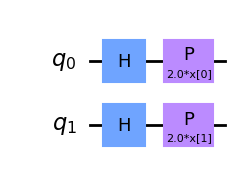

In [1]:
from qiskit.circuit.library import ZFeatureMap

zfm = ZFeatureMap(2, reps=1)
zfm.decompose().draw('mpl')

- <b> ZZFeatureMap:</b>circuito Z-evolución de Pauli de segundo orden

Un ZZFeature Map (PauliFeatureMap con entrelazamiento) proporciona ventaja cuántica genuina, mientras que un ZFeatureMap (PauliFeatureMap sin entrelazamiento) no proporciona ninguna ventaja cuántica conocida debido a la ausencia del operador de entrelazamiento. 

Como|S| ≤ 2, las interacciones entre los datos se codificarán en el FeatureMap


<b>Argumentos:</b>

- feature_dimensions: dimensionalidad de los datos clásicos (igual al número de qubits requeridos)

- reps: número de veces que se repite el circuito del mapa de características

- data_map_function: función que codifica los datos clásicos.

- entanglement: 'full' o 'linear' o incluso estructura de entrelazamiento propia

https://qiskit.org/documentation/stubs/qiskit.circuit.library.ZZFeatureMap.html

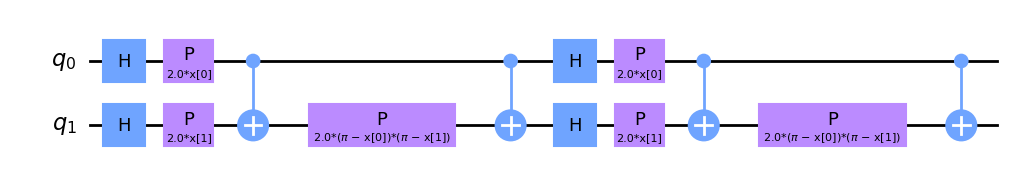

In [1]:
from qiskit.circuit.library import ZZFeatureMap

zzfm = ZZFeatureMap(feature_dimension=2, reps=2,entanglement='linear')
zzfm.decompose().draw('mpl')

- <b>PauliFeatureMap</b>

Forma más general de un mapa de características
Permite al usuario crear mapas de características usando diferentes puertas
El valor predeterminado es ['Z', 'ZZ'], que es equivalente a ZZFeatureMap.

<b>Argumentos</b>

- feature_dimensions: dimensionalidad de los datos clásicos (igual al número de qubits requeridos)

- reps: número de veces que se repite el circuito del mapa de características

- data_map_function: función que codifica los datos clásicos.

- entanglement: conectividad 'full' o 'linear' o define su propia estructura de entrelazamiento

- paulis: lista de cadenas de pauli

https://qiskit.org/documentation/stubs/qiskit.circuit.library.PauliFeatureMap.html

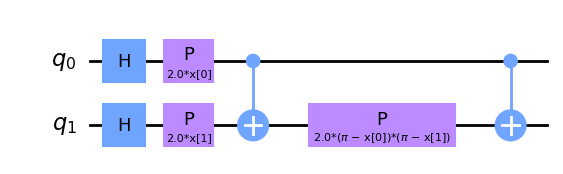

In [8]:
from qiskit.circuit.library import PauliFeatureMap
pfm = PauliFeatureMap(2, reps=1)
pfm.decompose().draw('mpl')


<b> Nota: </b>
También se pueden crear mapas de funciones personalizados utilizando la biblioteca NLocal y TwoLocal de Qiskit.

<b>En el resto del jupyter se hará uso del ZZFeatureMap con la configuración `zzfm` definida anteriormente.</b>

### Problema de QClasificación

Aclarados estos importantes aspectos previos, se puede ya plantear un sencillo problema de clasificación cuántica con un data set adhoc.


In [2]:
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.datasets import ad_hoc_data


#### Dataset `ad_hoc_data`

ad_hoc_data() es una clase para generar datasets de n features y etiquetas binarias.

<b>Parámetros configurables </b>

- feature_dim = c ; columnas de features del dataset; se generan otras tantas para labels.

- training_size = tr ; número de datapoints para entrenamiento
- test_size = ts : número de datapoints para test
- etiquetas:  se usa codificación one hot


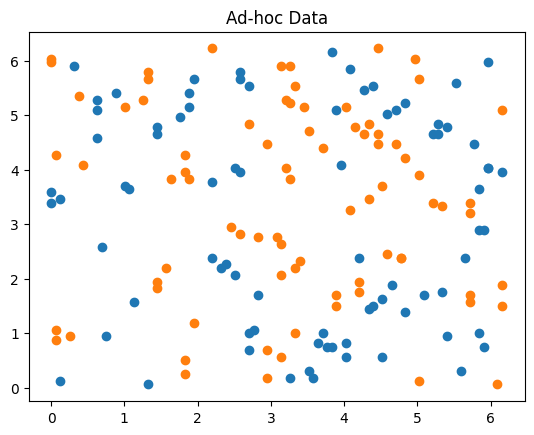

In [19]:
# DATASET SET>UP

# seed que garantiza repetibilidad. 

seed = 1376
algorithm_globals.random_seed = seed

# data-set conf

feature_dim = 2  # datapoint de dim 2
training_size = 80 # 80 datapoints para entrena. (longitud 2*80 
test_size = 10 # 10 datapoints para test (longitud 2*80)

training_features, training_labels, test_features, test_labels = ad_hoc_data(
    training_size=training_size, test_size=test_size, n=feature_dim, gap=0.3, plot_data=True
)



### Circuito ansatz variacional Twolocal con ZZFeatureMap

Decidida la vital cuestión de la elección y configuración del FeatureMap para la cuantificación del dataset, hay que decidir el circuito variacional que el clasificador cuántico usará para el fiting del modelo, permitiéndole variar los parámetros del array entrelazado de puertas de fase.

Este array de puertas será el Twolocal, muy usado también en problemas VQE.

https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html

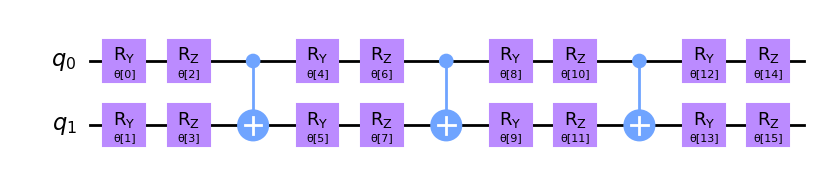

In [7]:
#ansatz variacional de 3 capas con puertas Ry, Rz param. y entrelazado CZ

feature_map = zzfm

ansatz = TwoLocal(feature_map.num_qubits, ["ry", "rz"], "cx", reps=3)

ansatz.decompose().draw('mpl')

### Clasificador cuántico variacional, VQC

Este clasificador tiene un esquema de parametrización muy similar al de cualquier otro algoritmo clásico de ML.

- indicación del train set: 
- función de coste: ansatz
- optimizador: un algoritmo clásico,p.e., COBYLA

Doc:

https://qiskit.org/ecosystem/machine-learning/stubs/qiskit_machine_learning.algorithms.VQC.html

Tutorial:

https://qiskit.org/documentation/stable/0.24/tutorials/machine_learning/03_vqc.html

In [43]:
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=100),
)
vqc.circuit.decompose().draw()

┌───┐┌─────────────┐                                          ┌───┐»
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■──┤ H ├»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└─────────────┘└───┘└──────────────────────────────┘└───┘└───┘»
«     ┌─────────────┐                                          ┌──────────┐»
«q_0: ┤ P(2.0*x[0]) ├──■────────────────────────────────────■──┤ Ry(θ[0]) ├»
«     ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐├──────────┤»
«q_1: ┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ Ry(θ[1]) ├»
«     └─────────────┘└───┘└──────────────────────────────┘└───┘└──────────┘»
«     ┌──────────┐     ┌──────────┐┌──────────┐     ┌──────────┐┌───────────┐»
«q_0: ┤ Rz(θ[2]) ├──■──┤ Ry(θ[4]) ├┤ Rz(θ[6]) ├──■──┤ Ry(θ[8]) ├┤ Rz(θ[10]) ├»
«     ├──────────┤┌─┴─┐├──────────┤├──────────┤┌─┴─┐├──────────┤├───────────┤»
«q_1: ┤ Rz(θ[3]) ├┤ X ├┤ Ry(θ[5]) ├┤ Rz(θ[7]) ├┤ X ├┤ Ry(θ[9]) ├┤ Rz(θ[11]) ├»
«     └──────────┘└───┘└──────────┘└──────────┘└───┘└──────────┘└───────────┘»
«          ┌───────────┐┌───────────┐
«q_0: ──■──┤ Ry(θ[12]) ├┤ Rz(θ[14]) ├
«     ┌─┴─┐├───────────┤├───────────┤
«q_1: ┤ X ├┤ Ry(θ[13]) ├┤ Rz(θ[15]) ├
«     └───┘└───────────┘└───────────┘

#### Fitting

In [9]:
vqc.fit(training_features, training_labels)


#### Scoring

In [10]:
score = vqc.score(test_features, test_labels)

print(f"Testing accuracy: {score:0.2f}")

Testing accuracy: 1.00


#### Generalización

In [28]:
test_features[0:3],test_labels[0:3]

(array([[2.45044227, 3.95840674],
        [0.06283185, 3.45575192],
        [2.136283  , 0.62831853]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.]]))

In [29]:
vqc.predict([0.25,5.15])

array([[0., 1.]])

In [30]:
vqc.predict([0.11,0.22])


array([[1., 0.]])

<b>Nota:</b>
    
Quedan métodos muy interesantes por explorar.
    
https://qiskit.org/ecosystem/machine-learning/stubs/qiskit_machine_learning.algorithms.VQC.html